# Imports

In [ ]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt
import warnings
# We import the warnings library to stop warnings from showing up as they do not provide added insights into statistical analysis
warnings.filterwarnings('ignore')

In [ ]:
import plotly.graph_objects as go

In [ ]:
from itertools import cycle
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
from sklearn.metrics import mean_squared_error

# Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PRML_BONUS_PROJECT/bitcoin_price_bitcoin_price (1).2013Apr-2017Aug.csv')

In [ ]:
df

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


# Preprocessing

## Checking the Features

In [ ]:
df.shape

(1556, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [ ]:
df.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


In [ ]:
print('Null Values:',df.isnull().values.sum())

Null Values: 0


## Converting Date into Pandas acceptable format

In [ ]:
month = {'Jan':'01',
		'Feb':'02',
		'Mar':'03',
		'Apr':'04',
		'May':'05',
		'Jun':'06',
		'Jul':'07',
		'Aug':'08',
		'Sep':'09',
		'Oct':'10',
		'Nov':'11',
		'Dec':'12'}

def date_format(x):
    arr = x.split()
    arr[0] = month[arr[0]]
    arr[1] = arr[1][0:-1]
    return str(arr[0]+'-' + arr[1]+ '-' + arr[2])

In [ ]:
df['Date'] = df['Date'].apply(date_format)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,07-31-2017,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,07-30-2017,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,07-29-2017,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,07-28-2017,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,07-27-2017,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"


## Checking the starting and ending dates

In [ ]:
sd=df.iloc[-1][0]
ed=df.iloc[0][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 04-28-2013
Ending Date 07-31-2017


# Visualizations

## Pairplot

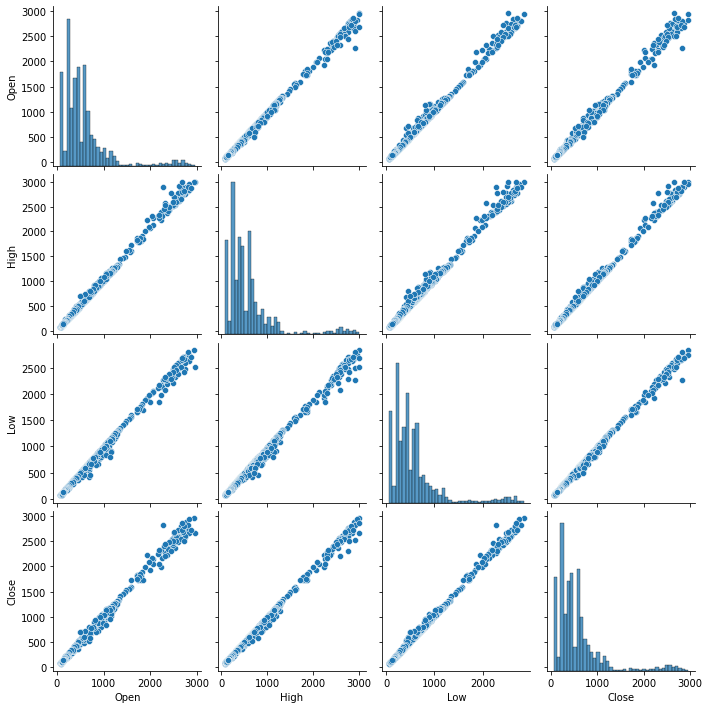

In [ ]:
sns.pairplot(df)

## Year wise Visualizations

### Year 2013

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

y_2013 = df.loc[(df['Date'] >= '2013-01-01')
                     & (df['Date'] <= '2013-12-31')]

In [ ]:
y_2013

,Date,Open,High,Low,Close,Volume,Market Cap
1308,2013-12-31,760.32,760.58,738.17,754.01,"20,897,300","9,268,240,000"
1309,2013-12-30,741.35,766.60,740.24,756.13,"20,707,700","9,037,000,000"
1310,2013-12-29,728.05,748.61,714.44,745.05,"19,011,300","8,872,600,000"
1311,2013-12-28,737.98,747.06,705.35,727.83,"32,505,800","8,990,850,000"
1312,2013-12-27,763.28,777.51,713.60,735.07,"46,862,700","9,295,570,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
monthvise= y_2013.groupby(y_2013['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,NaN,NaN,NaN,NaN
February,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN
April,137.913333,139.250000,143.466667,133.383333
May,120.292258,119.993226,123.949032,114.253548
June,108.856333,107.761333,111.300667,104.602333
July,90.311613,90.512258,93.869032,86.719355
August,113.041935,113.905161,116.002258,111.388065
September,130.180667,130.061667,134.164000,127.375333


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2013, x=y_2013.Date, y=[y_2013['Open'], y_2013['Close'], 
                                          y_2013['High'], y_2013['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Year 2014

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%Y')

y_2014 = df.loc[(df['Date'] >= '2014-01-01')
                     & (df['Date'] <= '2014-12-31')]

#y_2014.drop(y_2014[['Adj Close','Volume']],axis=1)

In [ ]:
y_2014

,Date,Open,High,Low,Close,Volume,Market Cap
943,2014-12-31,310.91,320.19,310.21,320.19,"13,942,900","4,249,480,000"
944,2014-12-30,312.72,314.81,309.37,310.74,"12,528,300","4,272,940,000"
945,2014-12-29,317.70,320.27,312.31,312.67,"12,302,500","4,339,700,000"
946,2014-12-28,316.16,320.03,311.08,317.24,"11,676,600","4,317,320,000"
947,2014-12-27,327.58,328.91,312.63,315.86,"15,185,200","4,472,050,000"
...,...,...,...,...,...,...,...
1303,2014-01-05,858.55,952.40,854.52,933.53,"72,898,500","10,465,700,000"
1304,2014-01-04,823.27,859.51,801.67,859.51,"38,005,000","10,035,600,000"
1305,2014-01-03,802.85,834.15,789.12,818.72,"37,810,100","9,786,680,000"
1306,2014-01-02,773.44,820.31,767.21,802.39,"38,489,500","9,428,180,000"


In [ ]:
monthvise= y_2014.groupby(y_2014['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,841.702258,844.168387,870.550645,814.900645
February,670.839286,661.618214,690.556071,632.392500
March,595.782258,592.200323,609.875161,578.266129
April,461.649000,461.362000,476.665667,444.637667
May,480.991290,486.651290,492.493871,475.034194
June,615.222000,615.917333,627.146333,603.713333
July,619.773548,618.025484,624.210645,612.974194
August,539.688065,536.087742,546.535806,527.420968
September,448.100333,445.186333,454.653667,438.951667


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2014.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2014.groupby(y_2014['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2014, x=y_2014.Date, y=[y_2014['Open'], y_2014['Close'], 
                                          y_2014['High'], y_2014['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Year 2015

In [ ]:
y_2015 = df.loc[(df['Date'] >= '2015-01-01')
                     & (df['Date'] <= '2015-12-31')]

In [ ]:
y_2015

,Date,Open,High,Low,Close,Volume,Market Cap
578,2015-12-31,425.88,432.92,418.74,430.57,"45,996,600","6,399,190,000"
579,2015-12-30,433.30,434.39,422.08,426.62,"46,889,400","6,508,960,000"
580,2015-12-29,422.10,432.98,420.63,432.98,"51,596,500","6,339,010,000"
581,2015-12-28,423.34,429.77,418.48,422.28,"49,638,600","6,356,100,000"
582,2015-12-27,416.51,424.01,408.88,422.82,"53,591,200","6,251,440,000"
...,...,...,...,...,...,...,...
938,2015-01-05,265.08,278.34,265.08,274.47,"43,962,800","3,628,490,000"
939,2015-01-04,281.15,287.23,257.61,264.19,"55,629,100","3,847,150,000"
940,2015-01-03,314.85,315.15,281.08,281.08,"33,054,400","4,307,010,000"
941,2015-01-02,314.08,315.84,313.56,315.03,"7,860,650","4,295,210,000"


In [ ]:
monthvise= y_2015.groupby(y_2015['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,251.800000,248.782581,261.390968,240.495806
February,232.821429,234.153571,240.212143,227.768571
March,269.278710,269.041290,274.851613,263.133871
April,235.707667,235.491667,238.958000,231.734667
May,237.162258,236.996774,239.562903,234.938710
June,236.941333,238.081000,240.126667,235.028333
July,278.857742,279.563871,284.122581,274.771290
August,252.987742,250.734516,256.415806,247.146452
September,233.487667,233.595333,236.685333,231.632000


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2015.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2015.groupby(y_2015['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2015, x=y_2015.Date, y=[y_2015['Open'], y_2015['Close'], 
                                          y_2015['High'], y_2015['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Year 2016

In [ ]:
y_2016 = df.loc[(df['Date'] >= '2016-01-01')
                     & (df['Date'] <= '2016-12-31')]

In [ ]:
y_2016

,Date,Open,High,Low,Close,Volume,Market Cap
212,2016-12-31,960.63,963.74,947.24,963.74,"99,135,100","15,440,700,000"
213,2016-12-30,972.53,972.53,934.83,961.24,"187,474,000","15,630,200,000"
214,2016-12-29,975.13,979.40,954.50,973.50,"199,320,000","15,670,000,000"
215,2016-12-28,934.83,975.92,934.83,975.92,"236,630,000","15,020,500,000"
216,2016-12-27,908.35,940.05,904.25,933.20,"167,308,000","14,593,300,000"
...,...,...,...,...,...,...,...
573,2016-01-05,433.07,434.18,429.68,431.96,"34,522,600","6,515,380,000"
574,2016-01-04,430.06,434.52,429.08,433.09,"38,477,500","6,468,180,000"
575,2016-01-03,433.58,433.74,424.71,430.01,"39,633,800","6,519,500,000"
576,2016-01-02,434.62,436.06,431.87,433.44,"30,096,600","6,533,630,000"


In [ ]:
monthvise= y_2016.groupby(y_2016['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,412.805806,410.844516,418.802581,403.494839
February,402.304828,404.408276,408.422414,398.191034
March,417.261935,416.525161,420.027742,413.330968
April,433.487333,434.339333,436.753333,430.642333
May,459.237419,461.953871,466.129677,455.771935
June,638.544333,642.869667,657.878667,619.871333
July,662.977419,661.355484,670.275484,652.487419
August,581.238710,579.585161,586.166452,574.551290
September,604.613667,605.848333,608.348000,601.865000


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2016.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2016.groupby(y_2016['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group', 
                  title=' Monthwise High and Low stock price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2016, x=y_2016.Date, y=[y_2016['Open'], y_2016['Close'], 
                                          y_2016['High'], y_2016['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

### Year 2017

In [ ]:
y_2017 = df.loc[(df['Date'] >= '2017-01-01')
                     & (df['Date'] <= '2017-12-31')]

In [ ]:
y_2017

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
207,2017-01-05,1156.73,1191.10,910.42,1013.38,"510,199,000","18,604,000,000"
208,2017-01-04,1044.40,1159.42,1044.40,1154.73,"344,946,000","16,795,400,000"
209,2017-01-03,1021.60,1044.08,1021.60,1043.84,"185,168,000","16,426,600,000"
210,2017-01-02,998.62,1031.39,996.70,1021.75,"222,185,000","16,055,100,000"


In [ ]:
monthvise= y_2017.groupby(y_2017['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,914.681290,914.916452,937.450000,887.202581
February,1055.620000,1062.533214,1073.503571,1040.417500
March,1133.212258,1129.365484,1161.893226,1099.865484
April,1197.647000,1206.641000,1216.303000,1188.385000
May,1865.748710,1895.383548,1968.786774,1812.038065
June,2630.573333,2636.204333,2712.255667,2538.007000
July,2509.213226,2519.418387,2603.998710,2425.572903
August,NaN,NaN,NaN,NaN
September,NaN,NaN,NaN,NaN


In [ ]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['High'],
    name='Stock Close Price',
    marker_color='green'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Low'],
    name='Stock Close Price',
    marker_color='blue'
))
fig.update_layout(barmode='group', xaxis_tickangle=-45, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2017, x=y_2017.Date, y=[y_2017['Open'], y_2017['Close'], 
                                          y_2017['High'], y_2017['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

## Overall Visualization

In [ ]:

y_overall = df.loc[(df['Date'] >= '2013-04-28')
                     & (df['Date'] <= '2017-07-31')]

In [ ]:
y_overall

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [ ]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close','High','Low']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close,High,Low
Date,,,,
January,605.247339,604.677984,622.048548,586.523468
February,588.731858,589.029912,601.450088,573.130442
March,603.883790,601.783065,616.661935,588.649113
April,571.288374,573.599756,581.226016,563.106829
May,632.686387,640.195742,658.184452,618.407290
June,846.027467,848.166733,869.741600,820.244467
July,832.226710,833.775097,855.295290,810.505032
August,371.739113,370.078145,376.280081,365.126694
September,354.095583,353.672917,358.462750,349.956000


In [ ]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

# Preparing Dataset to fit in models

In [ ]:
df['Dates'] = pd.to_datetime(df['Date'], unit='s')
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Dates
0,2017-07-31,2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000",2017-07-31
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2017-07-30
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2017-07-29
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2017-07-28
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2017-07-27


In [ ]:
df=df.iloc[::-1]

In [ ]:
df.set_index(df.index[::-1])

,Date,Open,High,Low,Close,Volume,Market Cap,Dates
0,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",2013-04-28
1,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",2013-04-29
2,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",2013-04-30
3,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2013-05-01
4,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",2013-05-02
...,...,...,...,...,...,...,...,...
1551,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2017-07-27
1552,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2017-07-28
1553,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2017-07-29
1554,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2017-07-30


# Testing Hypothesis 1

## Decision Tree

In [ ]:
required_features = ['Open', 'High', 'Low',]
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
x_train, x_test = df[required_features].iloc[0:train_size,:], df[required_features].iloc[train_size:len(df),:]
y_train, y_test = df[output_label].iloc[0:train_size], df[output_label].iloc[train_size:len(df)]
print(len(x_train), len(x_test))

1089 467


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = DecisionTreeRegressor()
model1.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

0.3036113072470361

Text(0, 0.5, '$ Price')

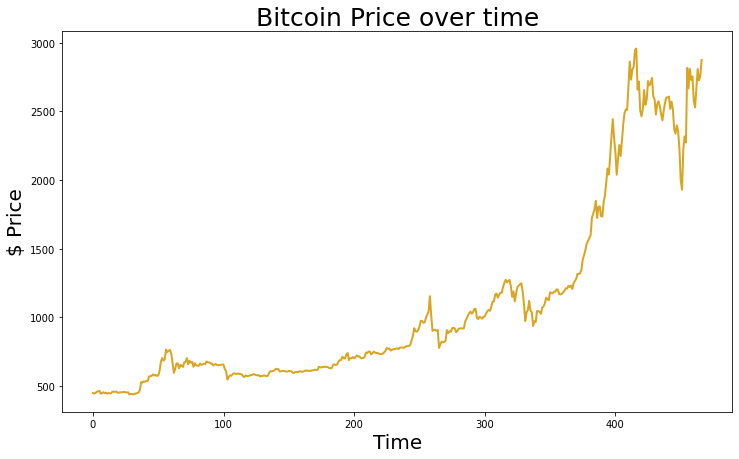

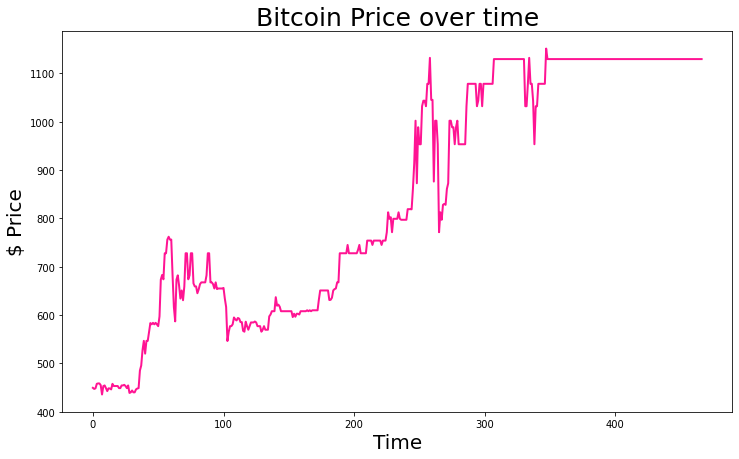

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

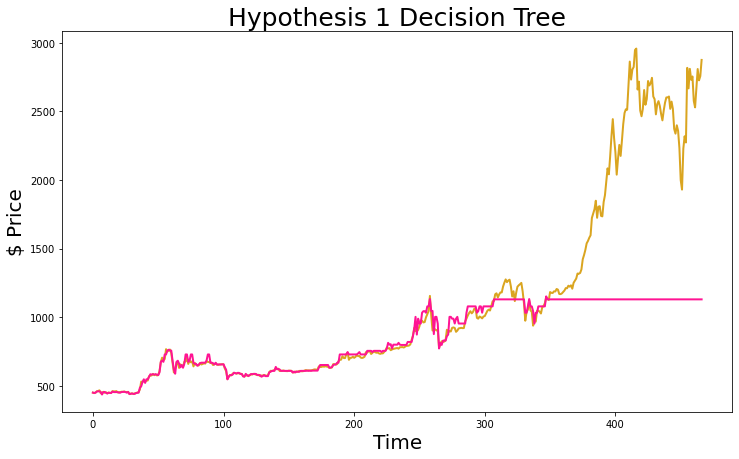

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Hypothesis 1 Decision Tree", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
future_set = df.shift(periods=30).tail(30)

In [ ]:
prediction1 = model1.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

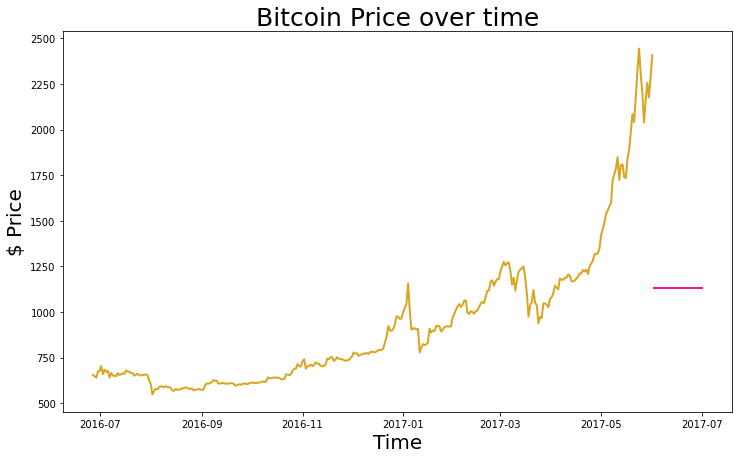

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

## Random Forest Regressor

In [ ]:
required_features = ['Open', 'High', 'Low',]
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
x_train, x_test = df[required_features].iloc[0:train_size,:], df[required_features].iloc[train_size:len(df),:]
y_train, y_test = df[output_label].iloc[0:train_size], df[output_label].iloc[train_size:len(df)]
print(len(x_train), len(x_test))

1089 467


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model1 = RandomForestRegressor()
model1.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

0.303470141633851

Text(0, 0.5, '$ Price')

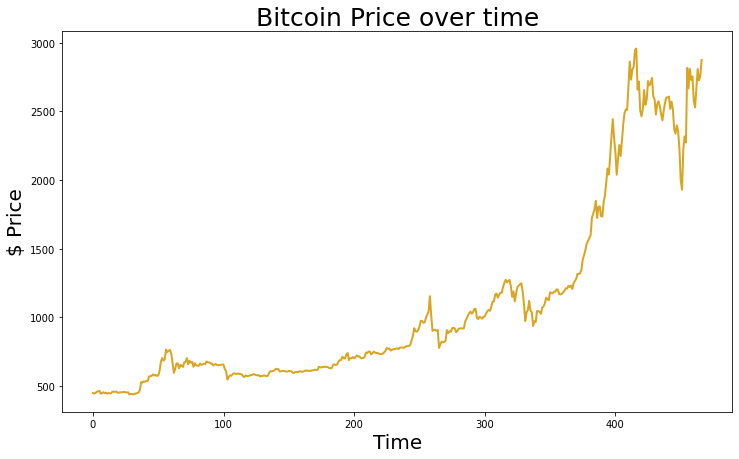

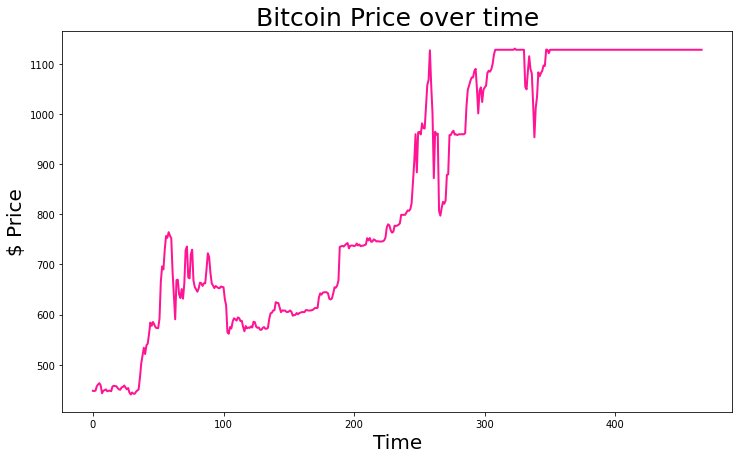

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

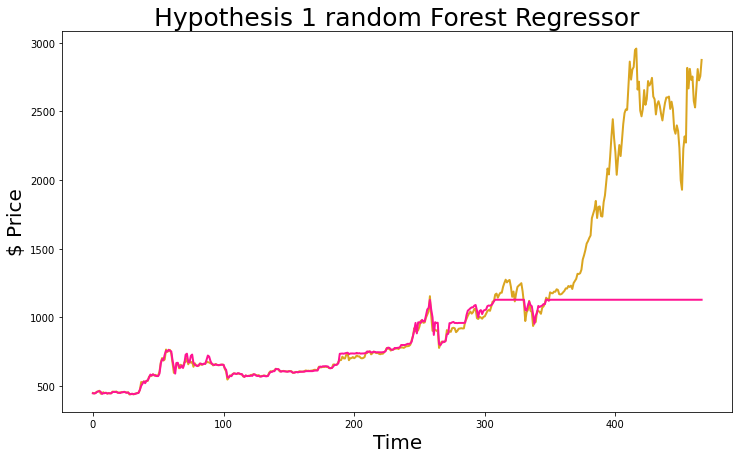

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Hypothesis 1 random Forest Regressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
future_set = df.shift(periods=30).tail(30)

In [ ]:
prediction1 = model1.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

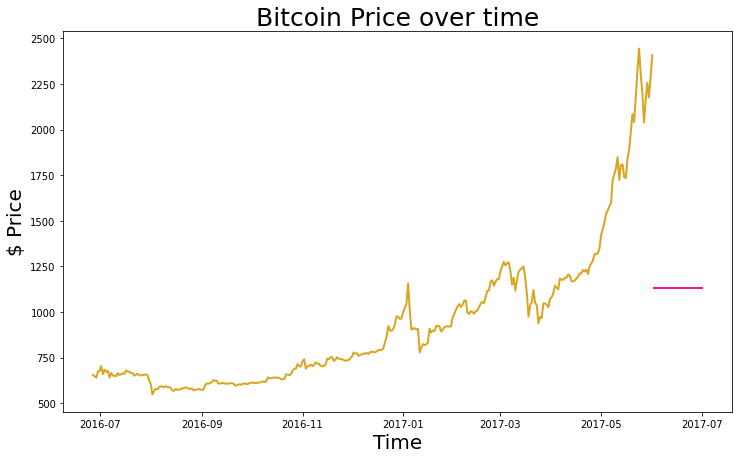

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

## LightGBM Regressor

In [ ]:
import lightgbm as lgb

In [ ]:
required_features = ['Open', 'High', 'Low',]
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
x_train, x_test = df[required_features].iloc[0:train_size,:], df[required_features].iloc[train_size:len(df),:]
y_train, y_test = df[output_label].iloc[0:train_size], df[output_label].iloc[train_size:len(df)]
print(len(x_train), len(x_test))

1089 467


In [ ]:
model1 = lgb.LGBMRegressor(random_state=42)

In [ ]:
model1.fit(x_train, y_train)

LGBMRegressor(random_state=42)

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

0.13106581988790034

Text(0, 0.5, '$ Price')

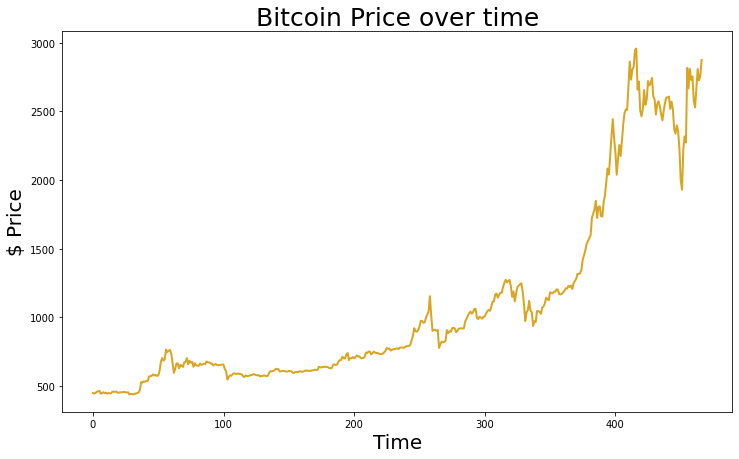

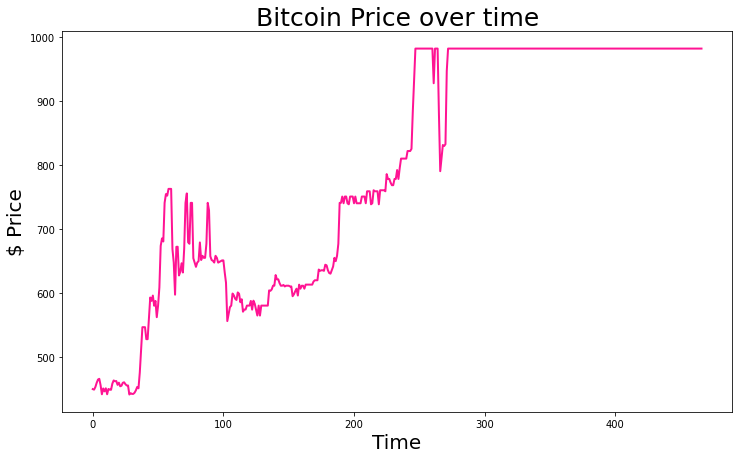

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

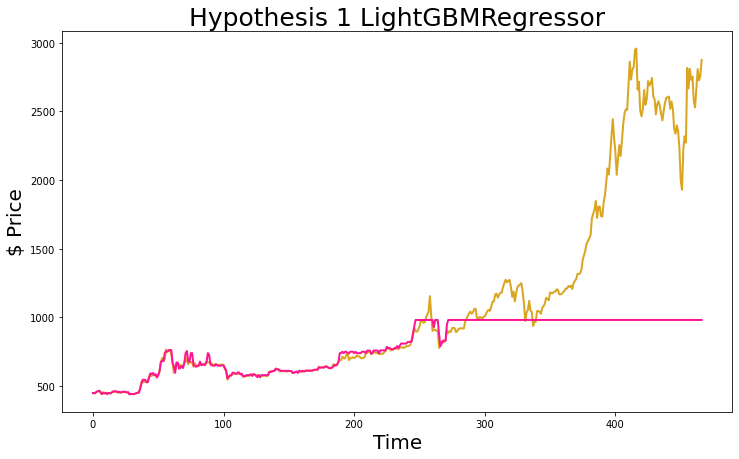

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Hypothesis 1 LightGBMRegressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
future_set = df.shift(periods=30).tail(30)

In [ ]:
prediction1 = model1.predict(future_set[required_features])

In [ ]:
prediction1 = model1.predict(future_set[required_features])

## SVM

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

In [ ]:
model1 = SVR(C=1.0, epsilon=0.2)

In [ ]:
required_features = ['Open', 'High', 'Low',]
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
x_train, x_test = df[required_features].iloc[0:train_size,:], df[required_features].iloc[train_size:len(df),:]
y_train, y_test = df[output_label].iloc[0:train_size], df[output_label].iloc[train_size:len(df)]
print(len(x_train), len(x_test))

1089 467


In [ ]:
model1.fit(x_train, y_train)

SVR(epsilon=0.2)

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

-0.9577903256790883

Text(0, 0.5, '$ Price')

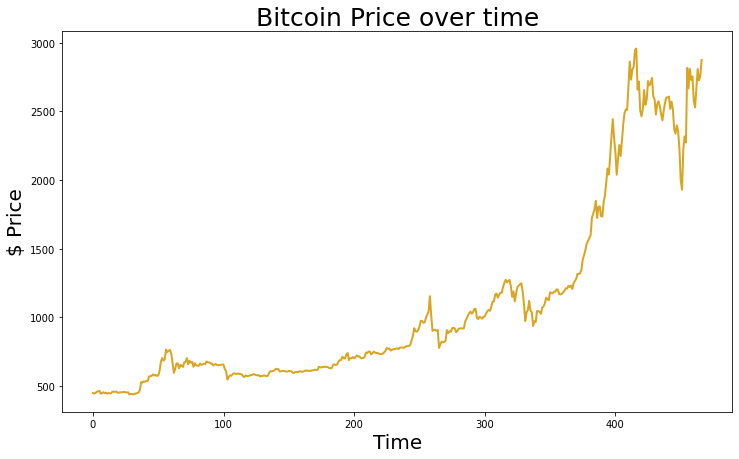

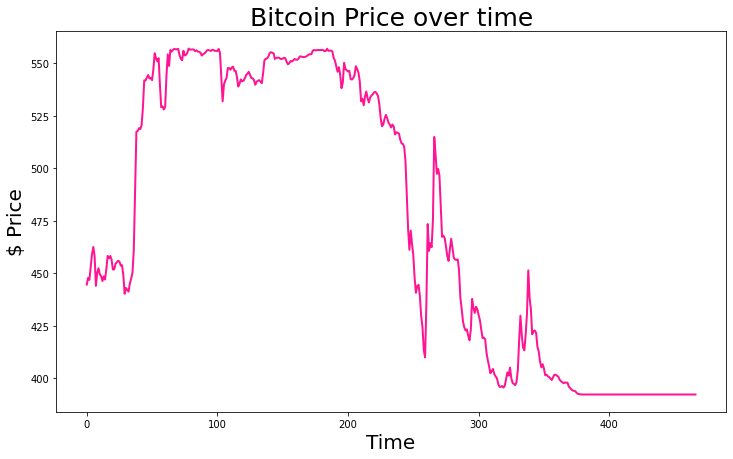

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

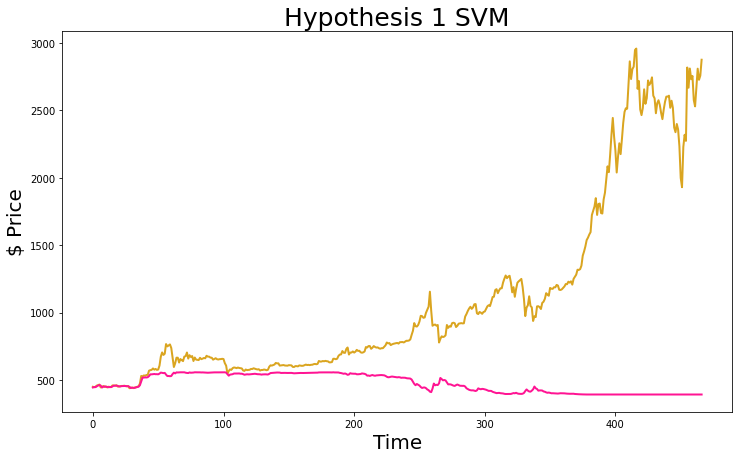

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Hypothesis 1 SVM", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
future_set = df.shift(periods=30).tail(30)

In [ ]:
prediction1 = model1.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

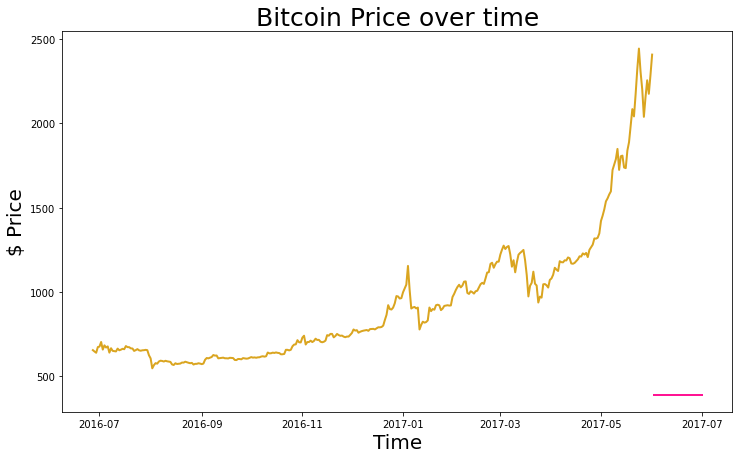

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

## Linear Regression

In [ ]:
required_features = ['Open', 'High', 'Low',]
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
x_train, x_test = df[required_features].iloc[0:train_size,:], df[required_features].iloc[train_size:len(df),:]
y_train, y_test = df[output_label].iloc[0:train_size], df[output_label].iloc[train_size:len(df)]
print(len(x_train), len(x_test))

1089 467


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred1=model1.predict(x_test)

In [ ]:
model1.score(x_test, y_test)

0.9982912410417375

In [ ]:
len(y_test)

467

In [ ]:
len(pred1)

467

In [ ]:
prediction1 = model1.predict(future_set[required_features])

Text(0, 0.5, '$ Price')

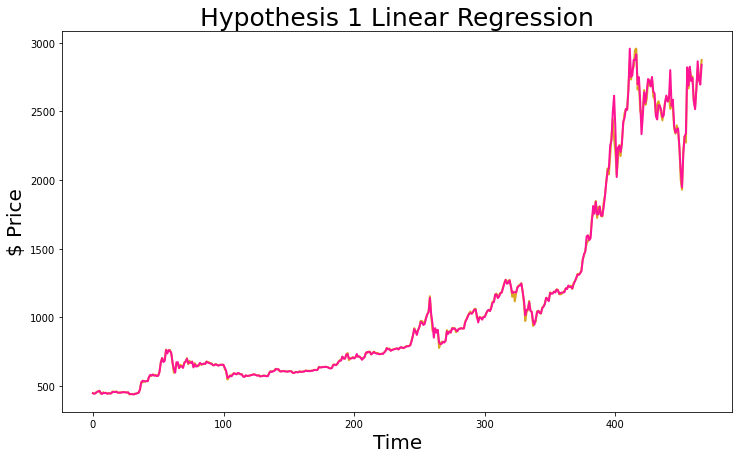

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Hypothesis 1 Linear Regression", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

Text(0, 0.5, '$ Price')

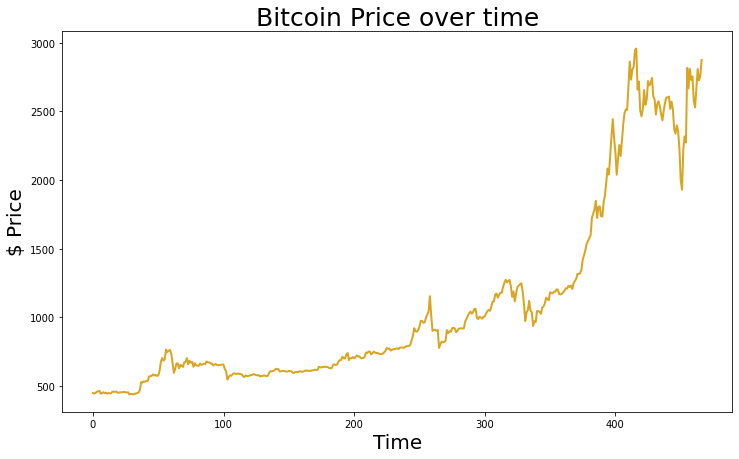

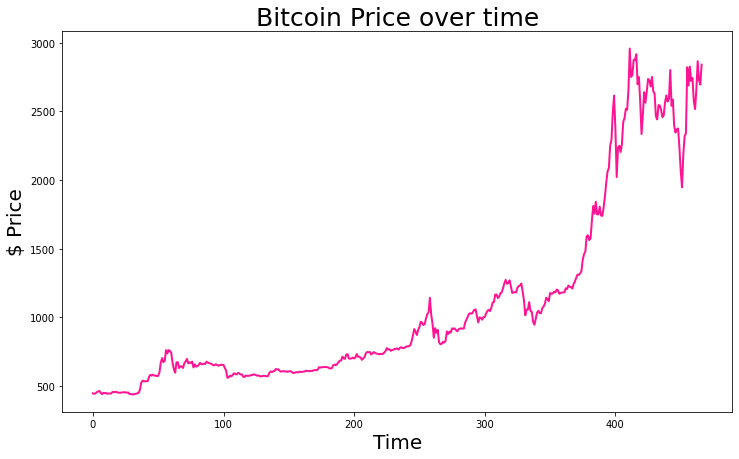

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(467),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(467),pred1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
future_set = df.shift(periods=30).tail(30)

Text(0, 0.5, '$ Price')

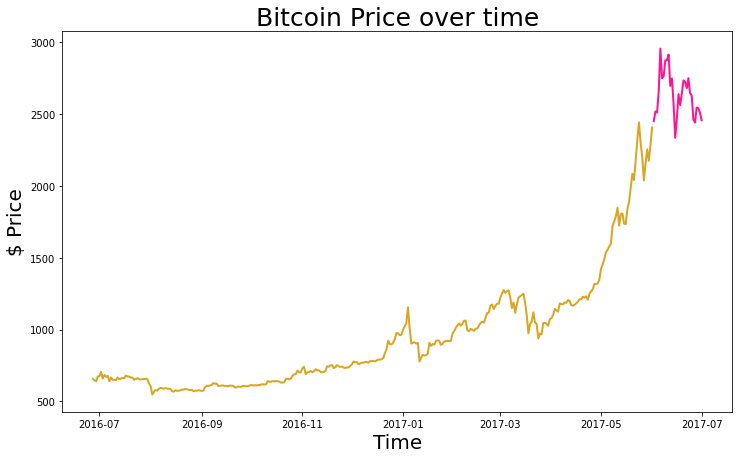

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(df["Date"][-400:-60], df["Close"][-400:-60], color='goldenrod', lw=2)
plt.plot(future_set["Date"], prediction1, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

# Testing Hypothesis 2

## Making New Dataset

In [ ]:
df2=df.copy()

In [ ]:
df2['Close_1day_ago']=df2['Close'].shift(+1)
df2['Close_2day_ago']=df2['Close'].shift(+2)
df2['Close_3day_ago']=df2['Close'].shift(+3)
df2['Close_4day_ago']=df2['Close'].shift(+4)
df2['Close_5day_ago']=df2['Close'].shift(+5)
df2['Close_6day_ago']=df2['Close'].shift(+6)
df2['Close_7day_ago']=df2['Close'].shift(+7)
df2

,Date,Open,High,Low,Close,Volume,Market Cap,Dates,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
1555,2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000",2013-04-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1554,2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000",2013-04-29,134.21,NaN,NaN,NaN,NaN,NaN,NaN
1553,2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000",2013-04-30,144.54,134.21,NaN,NaN,NaN,NaN,NaN
1552,2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000",2013-05-01,139.00,144.54,134.21,NaN,NaN,NaN,NaN
1551,2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000",2013-05-02,116.99,139.00,144.54,134.21,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2017-07-27,2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000",2017-07-27,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2017-07-28,2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000",2017-07-28,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2017-07-29,2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000",2017-07-29,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2017-07-30,2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000",2017-07-30,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 1555 to 0
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1556 non-null   datetime64[ns]
 1   Open            1556 non-null   float64       
 2   High            1556 non-null   float64       
 3   Low             1556 non-null   float64       
 4   Close           1556 non-null   float64       
 5   Volume          1556 non-null   object        
 6   Market Cap      1556 non-null   object        
 7   Dates           1556 non-null   datetime64[ns]
 8   Close_1day_ago  1555 non-null   float64       
 9   Close_2day_ago  1554 non-null   float64       
 10  Close_3day_ago  1553 non-null   float64       
 11  Close_4day_ago  1552 non-null   float64       
 12  Close_5day_ago  1551 non-null   float64       
 13  Close_6day_ago  1550 non-null   float64       
 14  Close_7day_ago  1549 non-null   float64       
dtypes: d

In [ ]:
df2=df2.dropna()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1549 entries, 1548 to 0
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1549 non-null   datetime64[ns]
 1   Open            1549 non-null   float64       
 2   High            1549 non-null   float64       
 3   Low             1549 non-null   float64       
 4   Close           1549 non-null   float64       
 5   Volume          1549 non-null   object        
 6   Market Cap      1549 non-null   object        
 7   Dates           1549 non-null   datetime64[ns]
 8   Close_1day_ago  1549 non-null   float64       
 9   Close_2day_ago  1549 non-null   float64       
 10  Close_3day_ago  1549 non-null   float64       
 11  Close_4day_ago  1549 non-null   float64       
 12  Close_5day_ago  1549 non-null   float64       
 13  Close_6day_ago  1549 non-null   float64       
 14  Close_7day_ago  1549 non-null   float64       
dtypes: d

## Decision Tree

In [ ]:
features=['Date','Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
required_features2 = ['Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(
#df2[features],
#df2[output_label],
#test_size = 0.3
#)

In [ ]:
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
x_train, x_test = df2[features].iloc[0:train_size,:], df2[features].iloc[train_size:len(df2),:]
y_train, y_test = df2[output_label].iloc[0:train_size], df2[output_label].iloc[train_size:len(df2)]
print(len(x_train), len(x_test))

1084 465


In [ ]:
model2 = DecisionTreeRegressor()
model2.fit(x_train[required_features2], y_train)

DecisionTreeRegressor()

In [ ]:
pred2=model2.predict(x_test[required_features2])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred2,y_test)

-16.29708396202645

In [ ]:
model2.score(x_test[required_features2], y_test)

-0.08003307003339866

In [ ]:
len(pred2),len(y_test)

(465, 465)

Text(0, 0.5, 'Price')

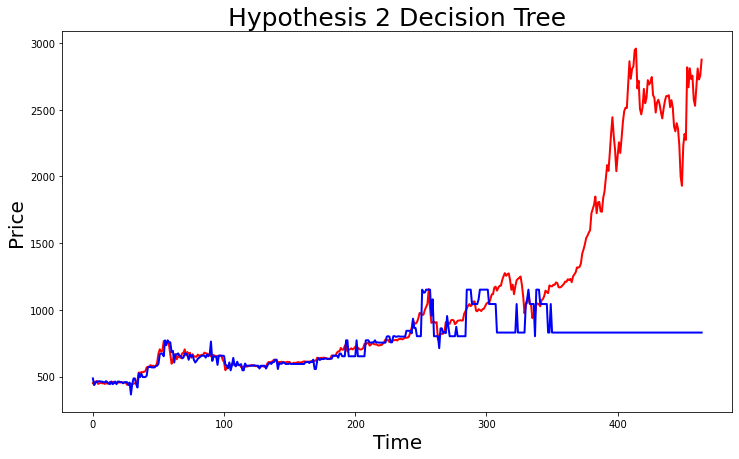

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='r', lw=2)
plt.plot(range(465),pred2, color='b', lw=2)
plt.title("Hypothesis 2 Decision Tree", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, '$ Price')

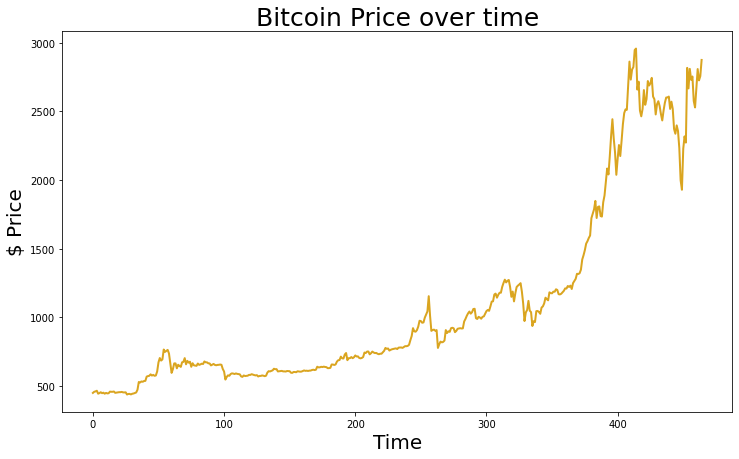

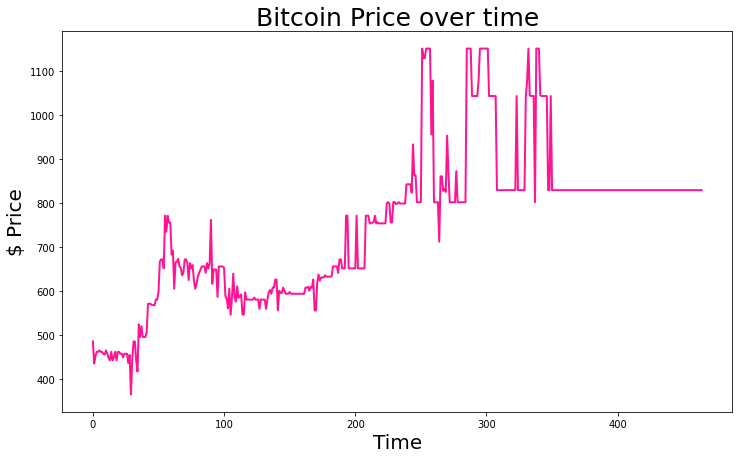

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(465),pred2, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
X=pd.DataFrame(x_test)

In [ ]:
X=X.drop(['Date'] , axis = 1)
X

,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
464,445.74,449.43,441.39,435.51,428.59,427.40,430.57
463,450.28,445.74,449.43,441.39,435.51,428.59,427.40
462,458.56,450.28,445.74,449.43,441.39,435.51,428.59
461,461.43,458.56,450.28,445.74,449.43,441.39,435.51
460,466.09,461.43,458.56,450.28,445.74,449.43,441.39
...,...,...,...,...,...,...,...
4,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
X.iloc[1]

Close_1day_ago    450.28
Close_2day_ago    445.74
Close_3day_ago    449.43
Close_4day_ago    441.39
Close_5day_ago    435.51
Close_6day_ago    428.59
Close_7day_ago    427.40
Name: 463, dtype: float64

In [ ]:
X.iloc[0,:].to_numpy().reshape(1,-1)

array([[445.74, 449.43, 441.39, 435.51, 428.59, 427.4 , 430.57]])

In [ ]:
y_test.to_numpy()


array([ 450.28,  458.56,  461.43,  466.09,  444.69,  449.01,  455.1 ,
        448.32,  451.88,  444.67,  450.3 ,  446.72,  447.98,  459.6 ,
        458.54,  458.55,  460.48,  450.89,  452.73,  454.77,  455.67,
        455.67,  457.57,  454.16,  453.78,  454.62,  438.71,  442.68,
        443.19,  439.32,  444.15,  445.98,  449.6 ,  453.38,  473.46,
        530.04,  526.23,  533.86,  531.39,  536.92,  537.97,  569.19,
        572.73,  574.98,  585.54,  576.6 ,  581.64,  574.63,  577.47,
        606.73,  672.78,  704.38,  685.56,  694.47,  766.31,  748.91,
        756.23,  763.78,  737.23,  666.65,  596.12,  623.98,  665.3 ,
        665.12,  629.37,  655.27,  647.  ,  639.89,  673.34,  676.3 ,
        703.7 ,  658.66,  683.66,  670.63,  677.33,  640.56,  666.52,
        650.96,  649.36,  647.66,  664.55,  654.47,  658.08,  663.25,
        660.77,  679.46,  673.11,  672.86,  665.68,  665.01,  650.62,
        655.56,  661.28,  654.1 ,  651.78,  654.35,  655.03,  656.99,
        655.05,  624

In [ ]:
prediction1=[]

In [ ]:
for i in range(458):
    prediction1.append(model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1)))
    X.iloc[i+1,:].to_numpy()[0]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+2,:].to_numpy()[1]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+3,:].to_numpy()[2]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+4,:].to_numpy()[3]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+5,:].to_numpy()[4]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+6,:].to_numpy()[5]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+7,:].to_numpy()[6]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))

In [ ]:
len(prediction1)

458

Text(0, 0.5, 'Price')

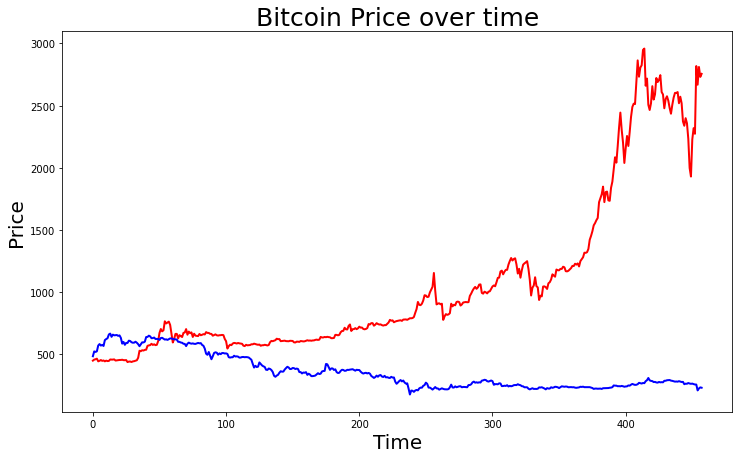

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(458),y_test[:458], color='r', lw=2)
plt.plot(range(458),prediction1[:458], color='b', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, 'Price')

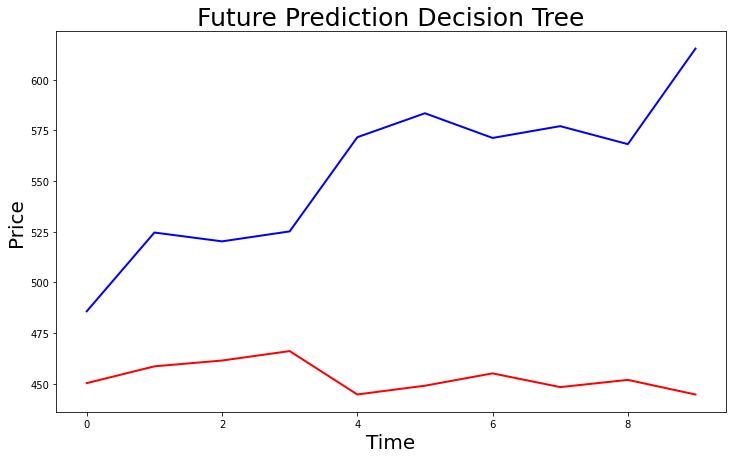

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(10),y_test[:10], color='r', lw=2)
plt.plot(range(10),prediction1[:10], color='b', lw=2)
plt.title("Future Prediction Decision Tree", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

In [ ]:
mean_squared_error(y_test[:5],prediction1[:5],squared=False)

75.71183606279803

## Random Forest regressor

In [ ]:
features=['Date','Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
required_features2 = ['Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(
#df2[features],
#df2[output_label],
#test_size = 0.3
#)

In [ ]:
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
x_train, x_test = df2[features].iloc[0:train_size,:], df2[features].iloc[train_size:len(df2),:]
y_train, y_test = df2[output_label].iloc[0:train_size], df2[output_label].iloc[train_size:len(df2)]
print(len(x_train), len(x_test))

1084 465


In [ ]:
model2 = RandomForestRegressor()
model2.fit(x_train[required_features2], y_train)

RandomForestRegressor()

In [ ]:
pred2=model2.predict(x_test[required_features2])

In [ ]:
model2.score(x_test[required_features2], y_test)

0.0951363510660247

In [ ]:
len(pred2),len(y_test)

(465, 465)

Text(0, 0.5, 'Price')

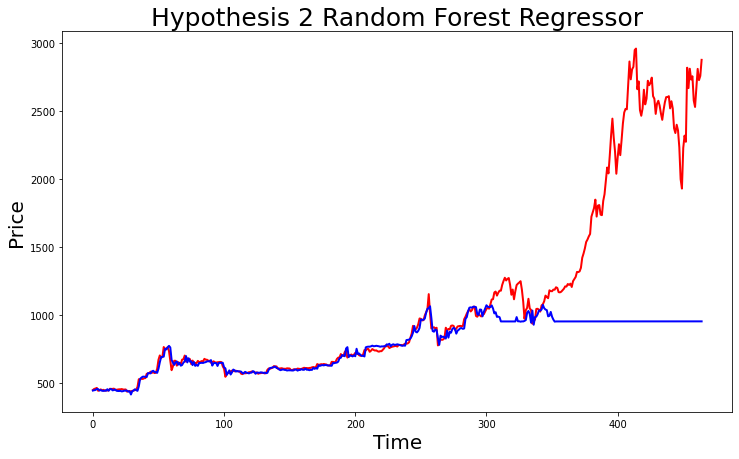

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='r', lw=2)
plt.plot(range(465),pred2, color='b', lw=2)
plt.title("Hypothesis 2 Random Forest Regressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, '$ Price')

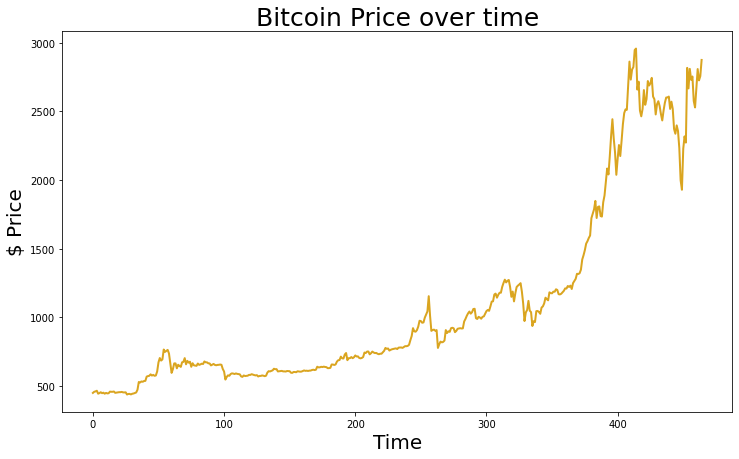

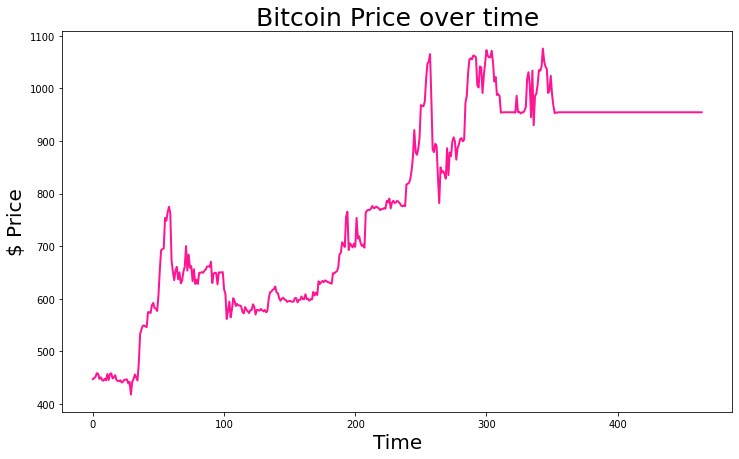

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(465),pred2, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
X=pd.DataFrame(x_test)

In [ ]:
X=X.drop(['Date'] , axis = 1)
X

,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
464,445.74,449.43,441.39,435.51,428.59,427.40,430.57
463,450.28,445.74,449.43,441.39,435.51,428.59,427.40
462,458.56,450.28,445.74,449.43,441.39,435.51,428.59
461,461.43,458.56,450.28,445.74,449.43,441.39,435.51
460,466.09,461.43,458.56,450.28,445.74,449.43,441.39
...,...,...,...,...,...,...,...
4,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
X.iloc[1]

Close_1day_ago    450.28
Close_2day_ago    445.74
Close_3day_ago    449.43
Close_4day_ago    441.39
Close_5day_ago    435.51
Close_6day_ago    428.59
Close_7day_ago    427.40
Name: 463, dtype: float64

In [ ]:
X.iloc[0,:].to_numpy().reshape(1,-1)

array([[445.74, 449.43, 441.39, 435.51, 428.59, 427.4 , 430.57]])

In [ ]:
y_test.to_numpy()


array([ 450.28,  458.56,  461.43,  466.09,  444.69,  449.01,  455.1 ,
        448.32,  451.88,  444.67,  450.3 ,  446.72,  447.98,  459.6 ,
        458.54,  458.55,  460.48,  450.89,  452.73,  454.77,  455.67,
        455.67,  457.57,  454.16,  453.78,  454.62,  438.71,  442.68,
        443.19,  439.32,  444.15,  445.98,  449.6 ,  453.38,  473.46,
        530.04,  526.23,  533.86,  531.39,  536.92,  537.97,  569.19,
        572.73,  574.98,  585.54,  576.6 ,  581.64,  574.63,  577.47,
        606.73,  672.78,  704.38,  685.56,  694.47,  766.31,  748.91,
        756.23,  763.78,  737.23,  666.65,  596.12,  623.98,  665.3 ,
        665.12,  629.37,  655.27,  647.  ,  639.89,  673.34,  676.3 ,
        703.7 ,  658.66,  683.66,  670.63,  677.33,  640.56,  666.52,
        650.96,  649.36,  647.66,  664.55,  654.47,  658.08,  663.25,
        660.77,  679.46,  673.11,  672.86,  665.68,  665.01,  650.62,
        655.56,  661.28,  654.1 ,  651.78,  654.35,  655.03,  656.99,
        655.05,  624

In [ ]:
prediction2=[]

In [ ]:
for i in range(458):
    prediction2.append(model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1)))
    X.iloc[i+1,:].to_numpy()[0]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+2,:].to_numpy()[1]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+3,:].to_numpy()[2]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+4,:].to_numpy()[3]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+5,:].to_numpy()[4]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+6,:].to_numpy()[5]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+7,:].to_numpy()[6]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))

In [ ]:
len(prediction2)

458

Text(0, 0.5, 'Price')

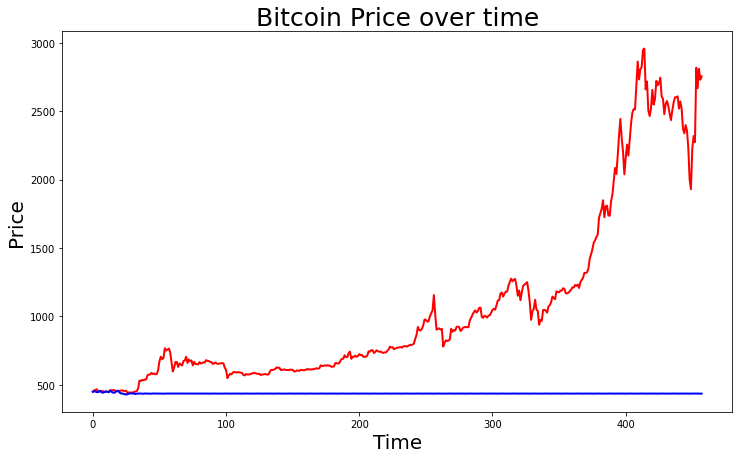

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(458),y_test[:458], color='r', lw=2)
plt.plot(range(458),prediction2[:458], color='b', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, 'Price')

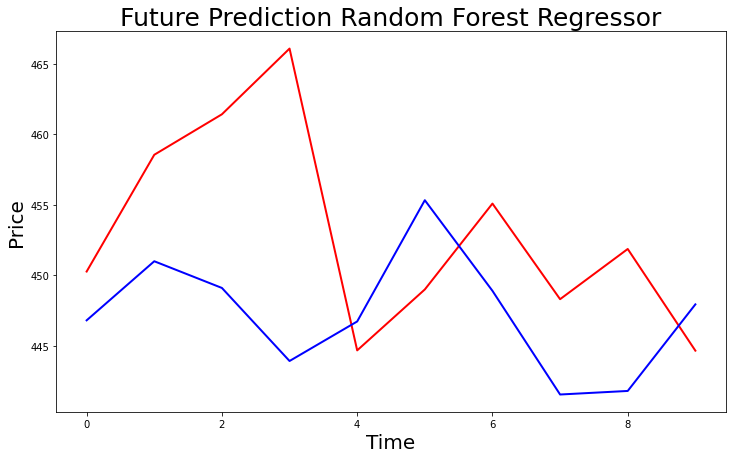

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(10),y_test[:10], color='r', lw=2)
plt.plot(range(10),prediction2[:10], color='b', lw=2)
plt.title("Future Prediction Random Forest Regressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

In [ ]:
mean_squared_error(y_test[:5],prediction2[:5],squared=False)

11.96279258066433

## LightGBMregressor

In [ ]:
features=['Date','Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
required_features2 = ['Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
x_train, x_test = df2[features].iloc[0:train_size,:], df2[features].iloc[train_size:len(df2),:]
y_train, y_test = df2[output_label].iloc[0:train_size], df2[output_label].iloc[train_size:len(df2)]
print(len(x_train), len(x_test))

1084 465


In [ ]:
model2 = lgb.LGBMRegressor(random_state=42)
model2.fit(x_train[required_features2], y_train)

LGBMRegressor(random_state=42)

In [ ]:
pred2=model2.predict(x_test[required_features2])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred2,y_test)

-13.735107385637885

In [ ]:
model2.score(x_test[required_features2], y_test)

0.06652397794152742

In [ ]:
len(pred2),len(y_test)

(465, 465)

Text(0, 0.5, 'Price')

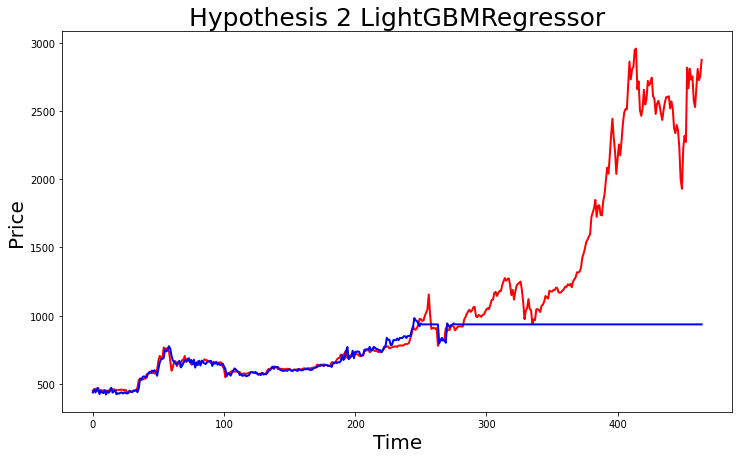

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='r', lw=2)
plt.plot(range(465),pred2, color='b', lw=2)
plt.title("Hypothesis 2 LightGBMRegressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, '$ Price')

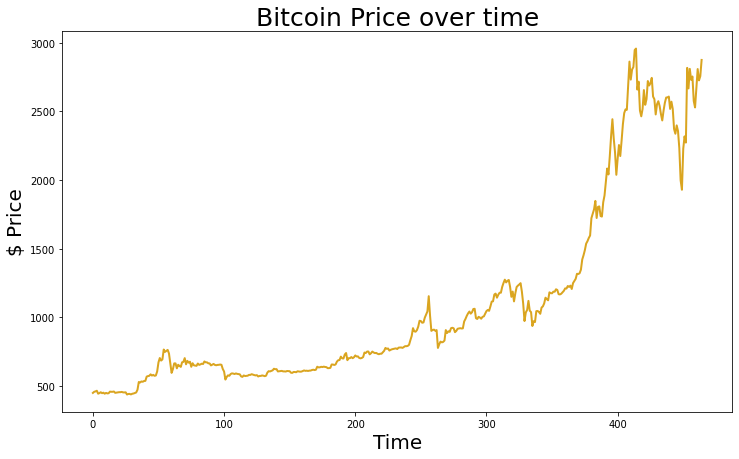

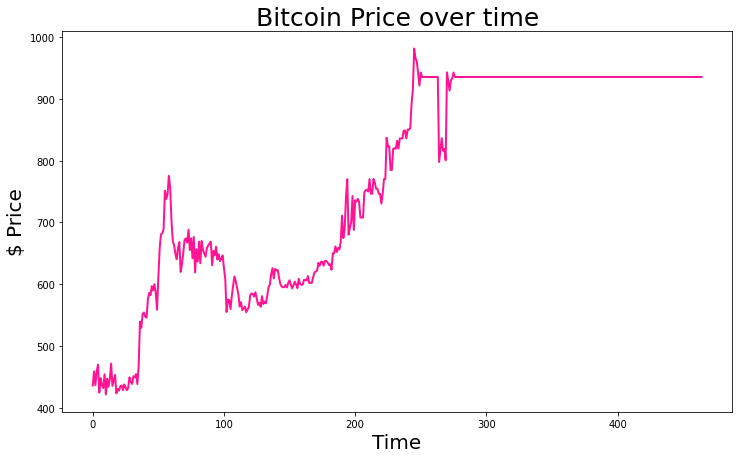

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(465),pred2, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
X=pd.DataFrame(x_test)

In [ ]:
X=X.drop(['Date'] , axis = 1)
X

,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
464,445.74,449.43,441.39,435.51,428.59,427.40,430.57
463,450.28,445.74,449.43,441.39,435.51,428.59,427.40
462,458.56,450.28,445.74,449.43,441.39,435.51,428.59
461,461.43,458.56,450.28,445.74,449.43,441.39,435.51
460,466.09,461.43,458.56,450.28,445.74,449.43,441.39
...,...,...,...,...,...,...,...
4,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
X.iloc[1]

Close_1day_ago    450.28
Close_2day_ago    445.74
Close_3day_ago    449.43
Close_4day_ago    441.39
Close_5day_ago    435.51
Close_6day_ago    428.59
Close_7day_ago    427.40
Name: 463, dtype: float64

In [ ]:
X.iloc[0,:].to_numpy().reshape(1,-1)

array([[445.74, 449.43, 441.39, 435.51, 428.59, 427.4 , 430.57]])

In [ ]:
y_test.to_numpy()


array([ 450.28,  458.56,  461.43,  466.09,  444.69,  449.01,  455.1 ,
        448.32,  451.88,  444.67,  450.3 ,  446.72,  447.98,  459.6 ,
        458.54,  458.55,  460.48,  450.89,  452.73,  454.77,  455.67,
        455.67,  457.57,  454.16,  453.78,  454.62,  438.71,  442.68,
        443.19,  439.32,  444.15,  445.98,  449.6 ,  453.38,  473.46,
        530.04,  526.23,  533.86,  531.39,  536.92,  537.97,  569.19,
        572.73,  574.98,  585.54,  576.6 ,  581.64,  574.63,  577.47,
        606.73,  672.78,  704.38,  685.56,  694.47,  766.31,  748.91,
        756.23,  763.78,  737.23,  666.65,  596.12,  623.98,  665.3 ,
        665.12,  629.37,  655.27,  647.  ,  639.89,  673.34,  676.3 ,
        703.7 ,  658.66,  683.66,  670.63,  677.33,  640.56,  666.52,
        650.96,  649.36,  647.66,  664.55,  654.47,  658.08,  663.25,
        660.77,  679.46,  673.11,  672.86,  665.68,  665.01,  650.62,
        655.56,  661.28,  654.1 ,  651.78,  654.35,  655.03,  656.99,
        655.05,  624

In [ ]:
prediction3=[]

In [ ]:
for i in range(458):
    prediction3.append(model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1)))
    X.iloc[i+1,:].to_numpy()[0]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+2,:].to_numpy()[1]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+3,:].to_numpy()[2]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+4,:].to_numpy()[3]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+5,:].to_numpy()[4]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+6,:].to_numpy()[5]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+7,:].to_numpy()[6]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))

In [ ]:
len(prediction3)

458

Text(0, 0.5, 'Price')

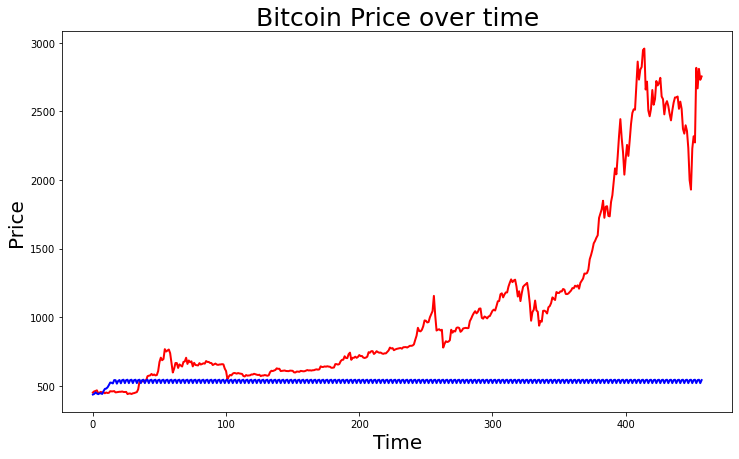

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(458),y_test[:458], color='r', lw=2)
plt.plot(range(458),prediction3[:458], color='b', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, 'Price')

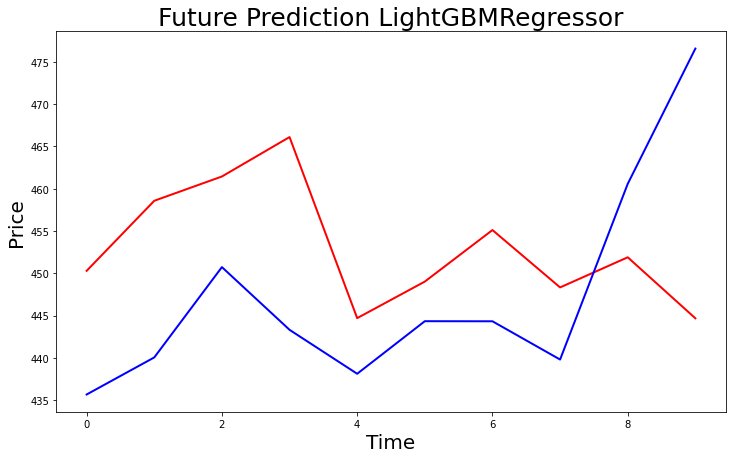

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(10),y_test[:10], color='r', lw=2)
plt.plot(range(10),prediction3[:10], color='b', lw=2)
plt.title("Future Prediction LightGBMRegressor", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

In [ ]:
mean_squared_error(y_test[:5],prediction3[:5],squared=False)

15.705702314106983

## SVM

In [ ]:
features=['Date','Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
required_features2 = ['Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
x_train, x_test = df2[features].iloc[0:train_size,:], df2[features].iloc[train_size:len(df2),:]
y_train, y_test = df2[output_label].iloc[0:train_size], df2[output_label].iloc[train_size:len(df2)]
print(len(x_train), len(x_test))

1084 465


In [ ]:
model2 = SVR(C=1.0, epsilon=0.2)
model2.fit(x_train[required_features2], y_train)

SVR(epsilon=0.2)

In [ ]:
pred2=model2.predict(x_test[required_features2])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred2,y_test)

-231.04246473337398

In [ ]:
model2.score(x_test[required_features2], y_test)

-0.9661420316688647

In [ ]:
len(pred2),len(y_test)

(465, 465)

Text(0, 0.5, 'Price')

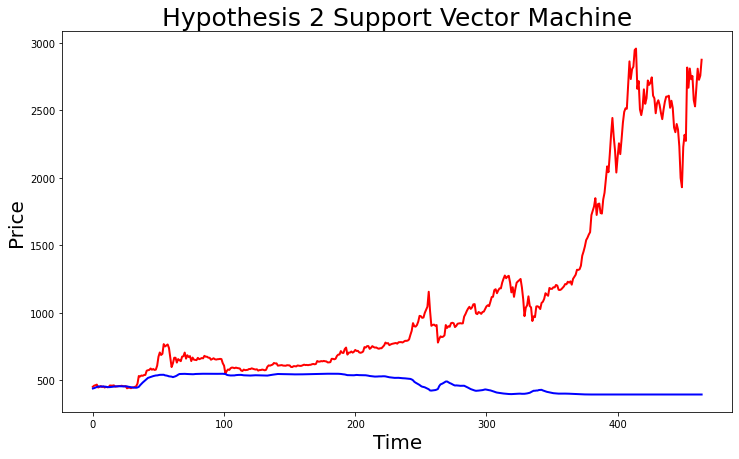

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='r', lw=2)
plt.plot(range(465),pred2, color='b', lw=2)
plt.title("Hypothesis 2 Support Vector Machine", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, '$ Price')

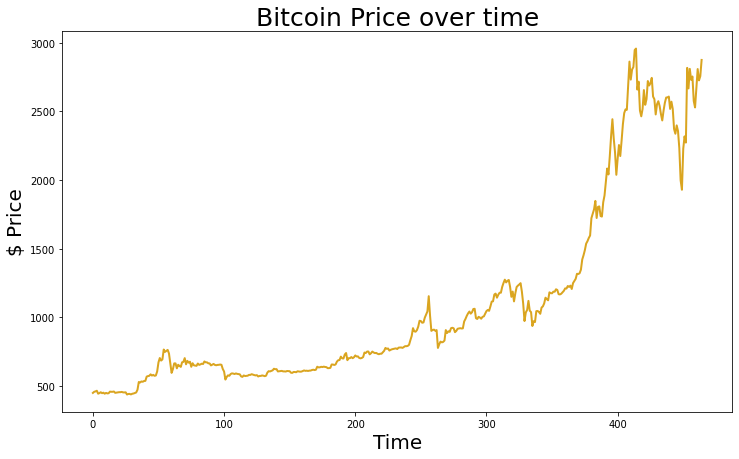

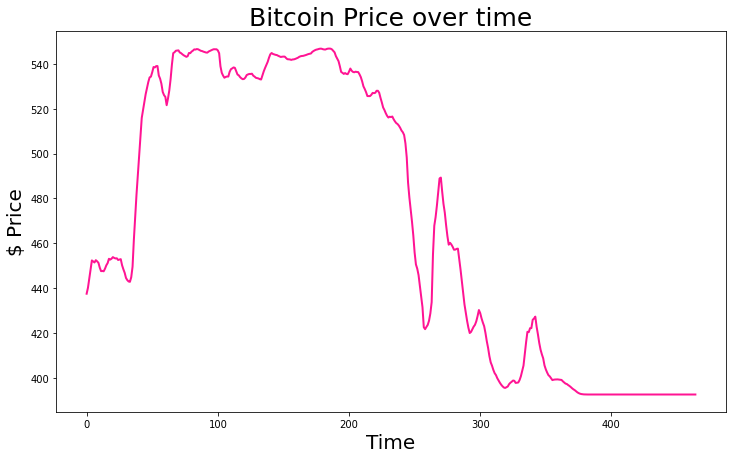

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(465),pred2, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
X=pd.DataFrame(x_test)

In [ ]:
X=X.drop(['Date'] , axis = 1)
X

,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
464,445.74,449.43,441.39,435.51,428.59,427.40,430.57
463,450.28,445.74,449.43,441.39,435.51,428.59,427.40
462,458.56,450.28,445.74,449.43,441.39,435.51,428.59
461,461.43,458.56,450.28,445.74,449.43,441.39,435.51
460,466.09,461.43,458.56,450.28,445.74,449.43,441.39
...,...,...,...,...,...,...,...
4,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
X.iloc[1]

Close_1day_ago    450.28
Close_2day_ago    445.74
Close_3day_ago    449.43
Close_4day_ago    441.39
Close_5day_ago    435.51
Close_6day_ago    428.59
Close_7day_ago    427.40
Name: 463, dtype: float64

In [ ]:
X.iloc[0,:].to_numpy().reshape(1,-1)

array([[445.74, 449.43, 441.39, 435.51, 428.59, 427.4 , 430.57]])

In [ ]:
y_test.to_numpy()


array([ 450.28,  458.56,  461.43,  466.09,  444.69,  449.01,  455.1 ,
        448.32,  451.88,  444.67,  450.3 ,  446.72,  447.98,  459.6 ,
        458.54,  458.55,  460.48,  450.89,  452.73,  454.77,  455.67,
        455.67,  457.57,  454.16,  453.78,  454.62,  438.71,  442.68,
        443.19,  439.32,  444.15,  445.98,  449.6 ,  453.38,  473.46,
        530.04,  526.23,  533.86,  531.39,  536.92,  537.97,  569.19,
        572.73,  574.98,  585.54,  576.6 ,  581.64,  574.63,  577.47,
        606.73,  672.78,  704.38,  685.56,  694.47,  766.31,  748.91,
        756.23,  763.78,  737.23,  666.65,  596.12,  623.98,  665.3 ,
        665.12,  629.37,  655.27,  647.  ,  639.89,  673.34,  676.3 ,
        703.7 ,  658.66,  683.66,  670.63,  677.33,  640.56,  666.52,
        650.96,  649.36,  647.66,  664.55,  654.47,  658.08,  663.25,
        660.77,  679.46,  673.11,  672.86,  665.68,  665.01,  650.62,
        655.56,  661.28,  654.1 ,  651.78,  654.35,  655.03,  656.99,
        655.05,  624

In [ ]:
prediction4=[]

In [ ]:
for i in range(458):
    prediction4.append(model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1)))
    X.iloc[i+1,:].to_numpy()[0]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+2,:].to_numpy()[1]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+3,:].to_numpy()[2]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+4,:].to_numpy()[3]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+5,:].to_numpy()[4]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+6,:].to_numpy()[5]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+7,:].to_numpy()[6]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))

In [ ]:
len(prediction1)

458

Text(0, 0.5, 'Price')

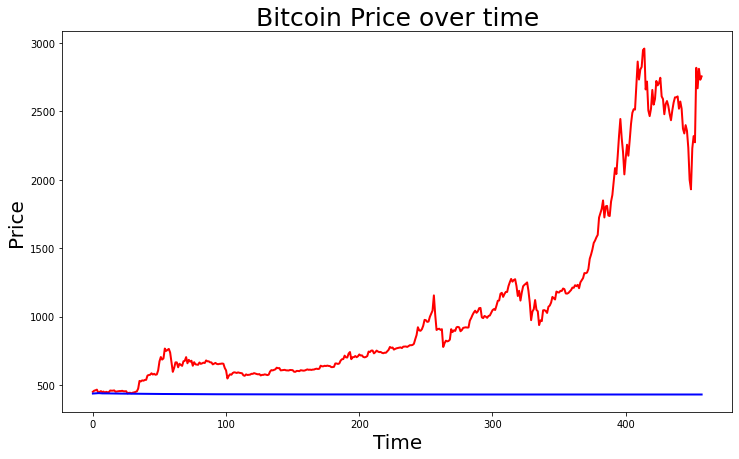

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(458),y_test[:458], color='r', lw=2)
plt.plot(range(458),prediction4[:458], color='b', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, 'Price')

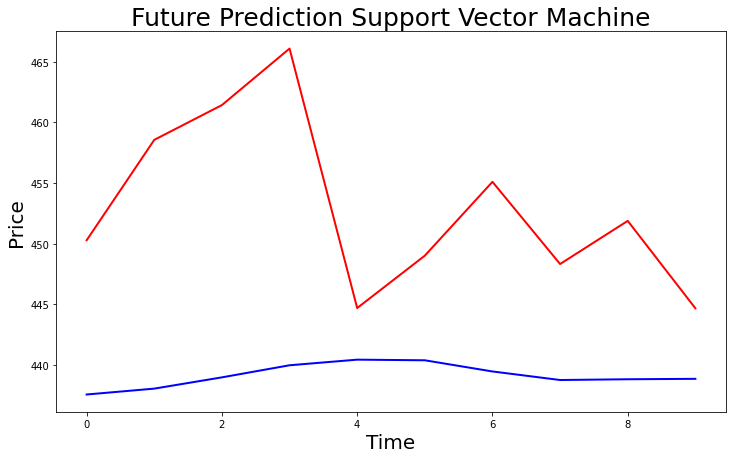

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(10),y_test[:10], color='r', lw=2)
plt.plot(range(10),prediction4[:10], color='b', lw=2)
plt.title("Future Prediction Support Vector Machine", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

In [ ]:
mean_squared_error(y_test[:5],prediction4[:5],squared=False)

18.90727359419116

## Linear Regression

In [ ]:
features=['Date','Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
required_features2 = ['Close_1day_ago','Close_2day_ago','Close_3day_ago','Close_4day_ago','Close_5day_ago','Close_6day_ago','Close_7day_ago']
# 'Volume', 'Market Cap'
output_label = 'Close'

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(
#df2[features],
#df2[output_label],
#test_size = 0.3
#)

In [ ]:
train_size = int(len(df2) * 0.7)
test_size = len(df2) - train_size
x_train, x_test = df2[features].iloc[0:train_size,:], df2[features].iloc[train_size:len(df2),:]
y_train, y_test = df2[output_label].iloc[0:train_size], df2[output_label].iloc[train_size:len(df2)]
print(len(x_train), len(x_test))

1084 465


In [ ]:
model2 = LinearRegression()
model2.fit(x_train[required_features2], y_train)

LinearRegression()

In [ ]:
pred2=model2.predict(x_test[required_features2])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(pred2,y_test)

0.9919014570839083

In [ ]:
model2.score(x_test[required_features2], y_test)

0.9921251784508653

In [ ]:
len(pred2),len(y_test)

(465, 465)

Text(0, 0.5, 'Price')

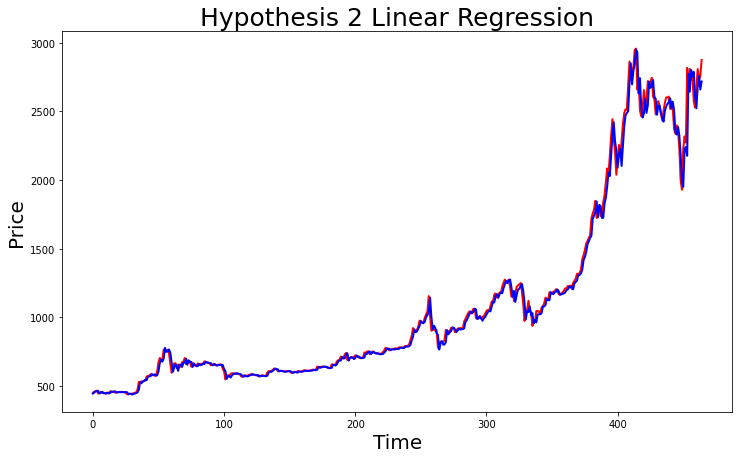

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='r', lw=2)
plt.plot(range(465),pred2, color='b', lw=2)
plt.title("Hypothesis 2 Linear Regression", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, '$ Price')

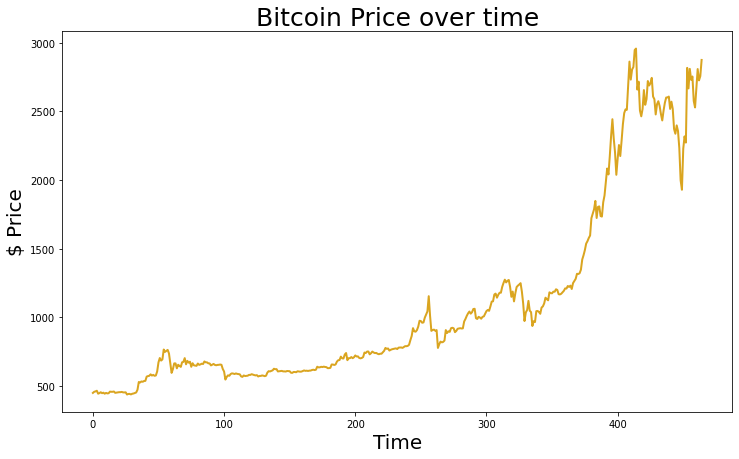

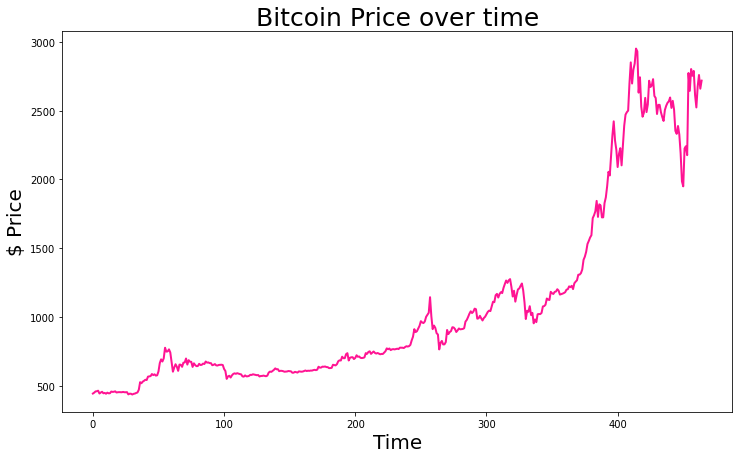

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(465),y_test, color='goldenrod', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)
plt.figure(figsize = (12, 7))
plt.plot(range(465),pred2, color='deeppink', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("$ Price", size=20)

In [ ]:
X=pd.DataFrame(x_test)

In [ ]:
X=X.drop(['Date'] , axis = 1)
X

,Close_1day_ago,Close_2day_ago,Close_3day_ago,Close_4day_ago,Close_5day_ago,Close_6day_ago,Close_7day_ago
464,445.74,449.43,441.39,435.51,428.59,427.40,430.57
463,450.28,445.74,449.43,441.39,435.51,428.59,427.40
462,458.56,450.28,445.74,449.43,441.39,435.51,428.59
461,461.43,458.56,450.28,445.74,449.43,441.39,435.51
460,466.09,461.43,458.56,450.28,445.74,449.43,441.39
...,...,...,...,...,...,...,...
4,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76,2817.60
3,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12,2667.76
2,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40,2810.12
1,2726.45,2809.01,2671.78,2529.45,2576.48,2754.86,2730.40


In [ ]:
X.iloc[1]

Close_1day_ago    450.28
Close_2day_ago    445.74
Close_3day_ago    449.43
Close_4day_ago    441.39
Close_5day_ago    435.51
Close_6day_ago    428.59
Close_7day_ago    427.40
Name: 463, dtype: float64

In [ ]:
X.iloc[0,:].to_numpy().reshape(1,-1)

array([[445.74, 449.43, 441.39, 435.51, 428.59, 427.4 , 430.57]])

In [ ]:
y_test.to_numpy()


array([ 450.28,  458.56,  461.43,  466.09,  444.69,  449.01,  455.1 ,
        448.32,  451.88,  444.67,  450.3 ,  446.72,  447.98,  459.6 ,
        458.54,  458.55,  460.48,  450.89,  452.73,  454.77,  455.67,
        455.67,  457.57,  454.16,  453.78,  454.62,  438.71,  442.68,
        443.19,  439.32,  444.15,  445.98,  449.6 ,  453.38,  473.46,
        530.04,  526.23,  533.86,  531.39,  536.92,  537.97,  569.19,
        572.73,  574.98,  585.54,  576.6 ,  581.64,  574.63,  577.47,
        606.73,  672.78,  704.38,  685.56,  694.47,  766.31,  748.91,
        756.23,  763.78,  737.23,  666.65,  596.12,  623.98,  665.3 ,
        665.12,  629.37,  655.27,  647.  ,  639.89,  673.34,  676.3 ,
        703.7 ,  658.66,  683.66,  670.63,  677.33,  640.56,  666.52,
        650.96,  649.36,  647.66,  664.55,  654.47,  658.08,  663.25,
        660.77,  679.46,  673.11,  672.86,  665.68,  665.01,  650.62,
        655.56,  661.28,  654.1 ,  651.78,  654.35,  655.03,  656.99,
        655.05,  624

In [ ]:
prediction5=[]

In [ ]:
for i in range(458):
    prediction5.append(model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1)))
    X.iloc[i+1,:].to_numpy()[0]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+2,:].to_numpy()[1]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+3,:].to_numpy()[2]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+4,:].to_numpy()[3]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+5,:].to_numpy()[4]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+6,:].to_numpy()[5]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))
    X.iloc[i+7,:].to_numpy()[6]=model2.predict(X.iloc[i,:].to_numpy().reshape(1,-1))

In [ ]:
len(prediction5)

458

Text(0, 0.5, 'Price')

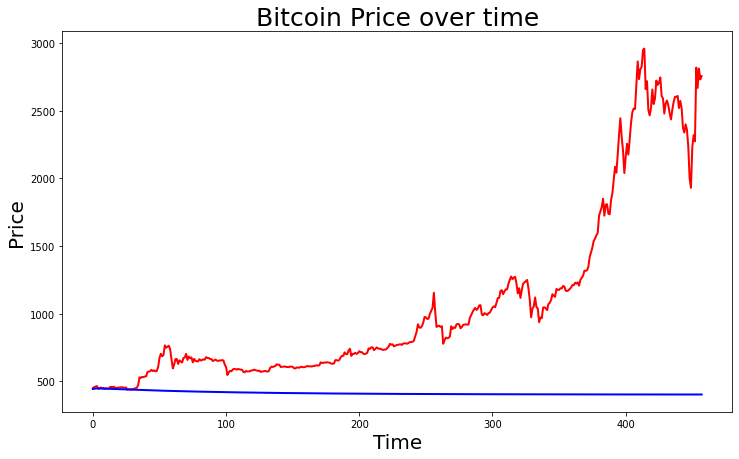

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(458),y_test[:458], color='r', lw=2)
plt.plot(range(458),prediction5[:458], color='b', lw=2)
plt.title("Bitcoin Price over time", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

Text(0, 0.5, 'Price')

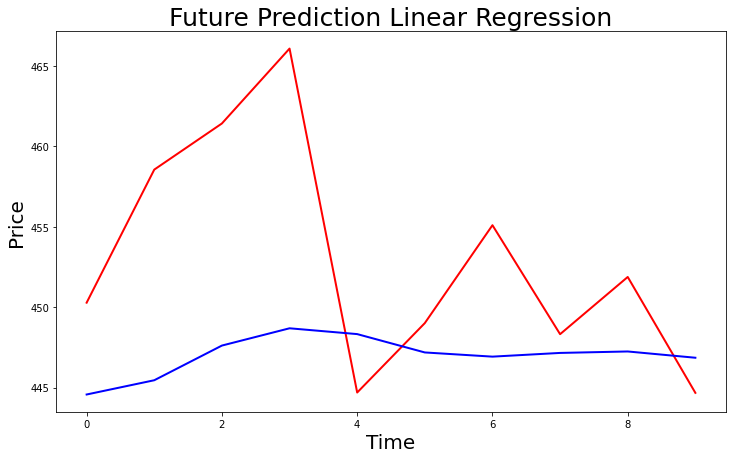

In [ ]:
plt.figure(figsize = (12, 7))
plt.plot(range(10),y_test[:10], color='r', lw=2)
plt.plot(range(10),prediction5[:10], color='b', lw=2)
plt.title("Future Prediction Linear Regression", size=25)
plt.xlabel("Time", size=20)
plt.ylabel("Price", size=20)

In [ ]:
mean_squared_error(y_test[:5],prediction5[:5],squared=False)

11.928373333158829

# Learning LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
values = df['Close'].values.reshape(-1,1)
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [ ]:
train_size = int(len(scaled) * 0.85)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))

1322 234


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

1321
233


In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
history = model.fit(trainX, trainY, epochs=300, batch_size=100, validation_data=(testX, testY), verbose=1, shuffle=False)

Epoch 1/300
14/14 [==============================] - 3s 49ms/step - loss: 0.0925 - val_loss: 0.4351
Epoch 2/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0585 - val_loss: 0.3780
Epoch 3/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0526 - val_loss: 0.3429
Epoch 4/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0525 - val_loss: 0.3250
Epoch 5/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0513 - val_loss: 0.3183
Epoch 6/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0493 - val_loss: 0.3104
Epoch 7/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0476 - val_loss: 0.2993
Epoch 8/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0461 - val_loss: 0.2875
Epoch 9/300
14/14 [==============================] - 0s 6ms/step - loss: 0.0446 - val_loss: 0.2765
Epoch 10/300
14/14 [==============================] - 0s 7ms/step - loss: 0.0429 - val_loss: 0.2647
Epoch 11

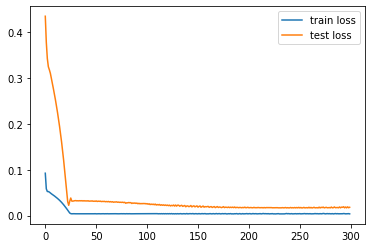

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

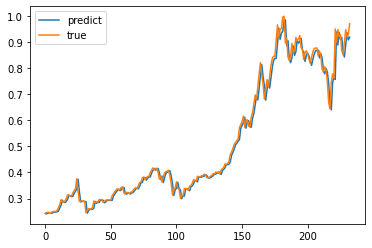

In [ ]:
yhat = model.predict(testX)
plt.plot(yhat, label='predict')
plt.plot(testY, label='true')
plt.legend()
plt.show()